In [2]:
import matplotlib.pyplot as plt
import control as co
import numpy as np
import sympy as sp

# Chapter 1

## Example 1.1

In [8]:
# Greek alphabet
from sympy.abc import theta
# English alphabet
from sympy.abc import a, s, t, T

In [ ]:
prod = sp.collect(sp.expand((s + 1)*(s + a)), s)
prod

In [ ]:
Go_1 = co.tf([1], [1, 1 - 0.01, -0.01])

Go_2 = co.tf([1], [1, 1, 0])

Go_3 = co.tf([1], [1, 1 + 0.01, 0.01])

In [ ]:
systems = [Go_1, Go_2, Go_3]
# time_ol = np.linspace(0, 300, 700) # Full response showing the divergence
time_ol = np.linspace(0, 50, 700) # Zoomed in to show that the initial portions of the responses are similar

### Open loop response

In [1]:
for sys in systems:
    T, y = co.step_response(sys, T=time_ol)
    plt.plot(T, y)
plt.xlabel('Time, t (s)')
plt.ylabel('Response')
plt.legend(['a = -0.01', 'a = 0', 'a = 0.01'])
plt.show()

NameError: name 'systems' is not defined

### Closed Loop Response

In [ ]:
# time_cl = np.linspace(0, 300, 700) # Full response showing the divergence
time_cl = np.linspace(0, 13, 50) # Zoomed in to show that the initial portions of the responses are similar

In [ ]:
systems_cl = []
for sys in systems:
    sys_closed_loop = co.feedback(sys, 1)
    T, y = co.step_response(sys_closed_loop, T=time_cl)
    plt.plot(T, y)
    systems_cl.append(sys_closed_loop)
plt.xlabel('Time, t (s)')
plt.ylabel('Response')
plt.legend(['a = -0.01', 'a = 0', 'a = 0.01'])
plt.show()

### Bode Plots 

In [ ]:
for sys in systems:
    co.bode_plot(sys, dB=False, deg=False)

In [ ]:
for sys in systems_cl:
    co.bode(sys, dB=False, deg=False, grid=False)

## Example 1.2

In [ ]:
# Greek alphabet
from sympy.abc import theta
# English alphabet
from sympy.abc import a, s, T

In [ ]:
num = sp.collect(sp.expand(400*(1 - s*T)), s)
num

In [ ]:
denum = sp.collect(sp.expand((s + 1)*(s + 20)*(1 + T*s)), s)
denum


In [ ]:
# systems = [co.tf(Go_1), co.tf(Go_2), co.tf(Go_3)]
systems_ol = []
systems_cl = []
T_vals = [0, 0.015, 0.03]
time_ol = np.linspace(0, 5, 200)
time_cl = np.linspace(0, 1, 100)
for Tv in T_vals:
    
    if Tv != 0:
        num_lop = sp.Poly(num.subs(T, Tv)).all_coeffs()
    else:
        num_lop = [400]
    den_lop = sp.Poly(denum.subs(T, Tv)).all_coeffs()
    sys_lop = co.tf([float(n) for n in num_lop], [float(d) for d in den_lop])
    
    # Open Loop
    systems_ol.append(sys_lop)
    T_lop, y = co.step_response(sys_lop, time_ol)
    plt.figure(1)
    plt.plot(T_lop, y)
    
    # Closed Loop
    sys_lop = co.feedback(sys_lop, 1)
    systems_cl.append(sys_lop)
    T_lop, y = co.step_response(sys_lop, time_cl)
    plt.figure(2)
    plt.plot(T_lop, y)
plt.legend(['T=0', 'T=0.015', 'T=0.03'])
plt.figure(1)
plt.legend(['T=0', 'T=0.015', 'T=0.03'])
plt.show()

### Bode Plots

In [ ]:
for sys in systems_ol:
    co.bode_plot(sys, dB=False, deg=True)

In [ ]:
for sys in systems_cl:
    co.bode_plot(sys, dB=False, deg=True)

## Example 1.4

In [ ]:
# Greek alphabet
from sympy.abc import theta
# English alphabet
from sympy.abc import a, s, t, K, T

In [ ]:
u_vals = [0.3, 1.1, 5.1]
time = np.linspace(0, 50, 200)
for idx, uv in enumerate(u_vals):
    plt.subplot(3, 1, (idx + 1))
    sys1 = co.tf([(0.6*uv**3), (0.6*uv**3)], [1, 0])
    sys2 = co.tf([1], [1, 3, 3, 1])
    sys = co.feedback(co.series(sys1, sys2))
    T_lop, y = co.step_response(sys, T=time)
    plt.plot(T_lop, y*uv)
# plt.legend(['0.3', '1.1', '5.1'])
plt.show()

# Chapter 2

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from numpy import transpose as trans
from numpy.random import normal
from numpy.linalg import inv

## Example 2.12

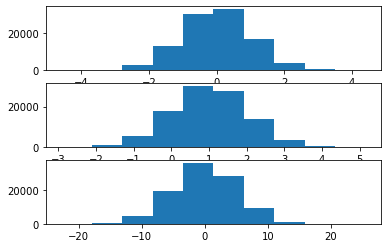

In [17]:
plt.subplot(3,1,1)
plt.hist(samples_0_1)
plt.subplot(3,1,2)
plt.hist(samples_1_1)
plt.subplot(3,1,3)
plt.hist(samples_0_5)
plt.show()